In [8]:
import torch
import matplotlib.pyplot as plt
import lucent
import numpy as np
import glob
import pickle

In [2]:
print(glob.glob('E:/Jose/models/*'))

model_name = 'model_3_10_1669812168_epoch_19_loss_0.30057196410397596.pt'
model_name = 'model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt'
roi, layer = list(map(int, model_name.split('_')[1:3]))

['E:/Jose/models\\model_3_10_1669812168_epoch_19_loss_0.30057196410397596.pt', 'E:/Jose/models\\model_9_0_1668057431_min_val_loss__0.8882070855137573.pt', 'E:/Jose/models\\model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt', 'E:/Jose/models\\rm90.pt']


In [3]:
data_filename  = 'E:/Jose/Data/data_THINGS_array'+ str(roi) +'_v1.pkl'

# load data
f = open(data_filename,"rb")
cc = pickle.load(f)

train_data = cc['train_data']
val_data = cc['val_data']
img_data = cc['img_data']
val_img_data = cc['val_img_data']
n_neurons = train_data.shape[1]

print(n_neurons)

43


In [4]:
from lucent.modelzoo import vgg19, util
from cadena_model import VggModel

gpu_to_use = 0
GPU = torch.cuda.is_available()

vgg_pretrained = vgg19(pretrained = True)
net = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"));
net.cuda();

c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv_layer:   0 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[64, 224, 224, 43]


In [6]:
net.load_state_dict(torch.load('E:/Jose/models/'+model_name, map_location=torch.device('cpu')))
print(net.w.shape)
w = net.w.cpu().detach().numpy()

torch.Size([64, 224, 224, 43])


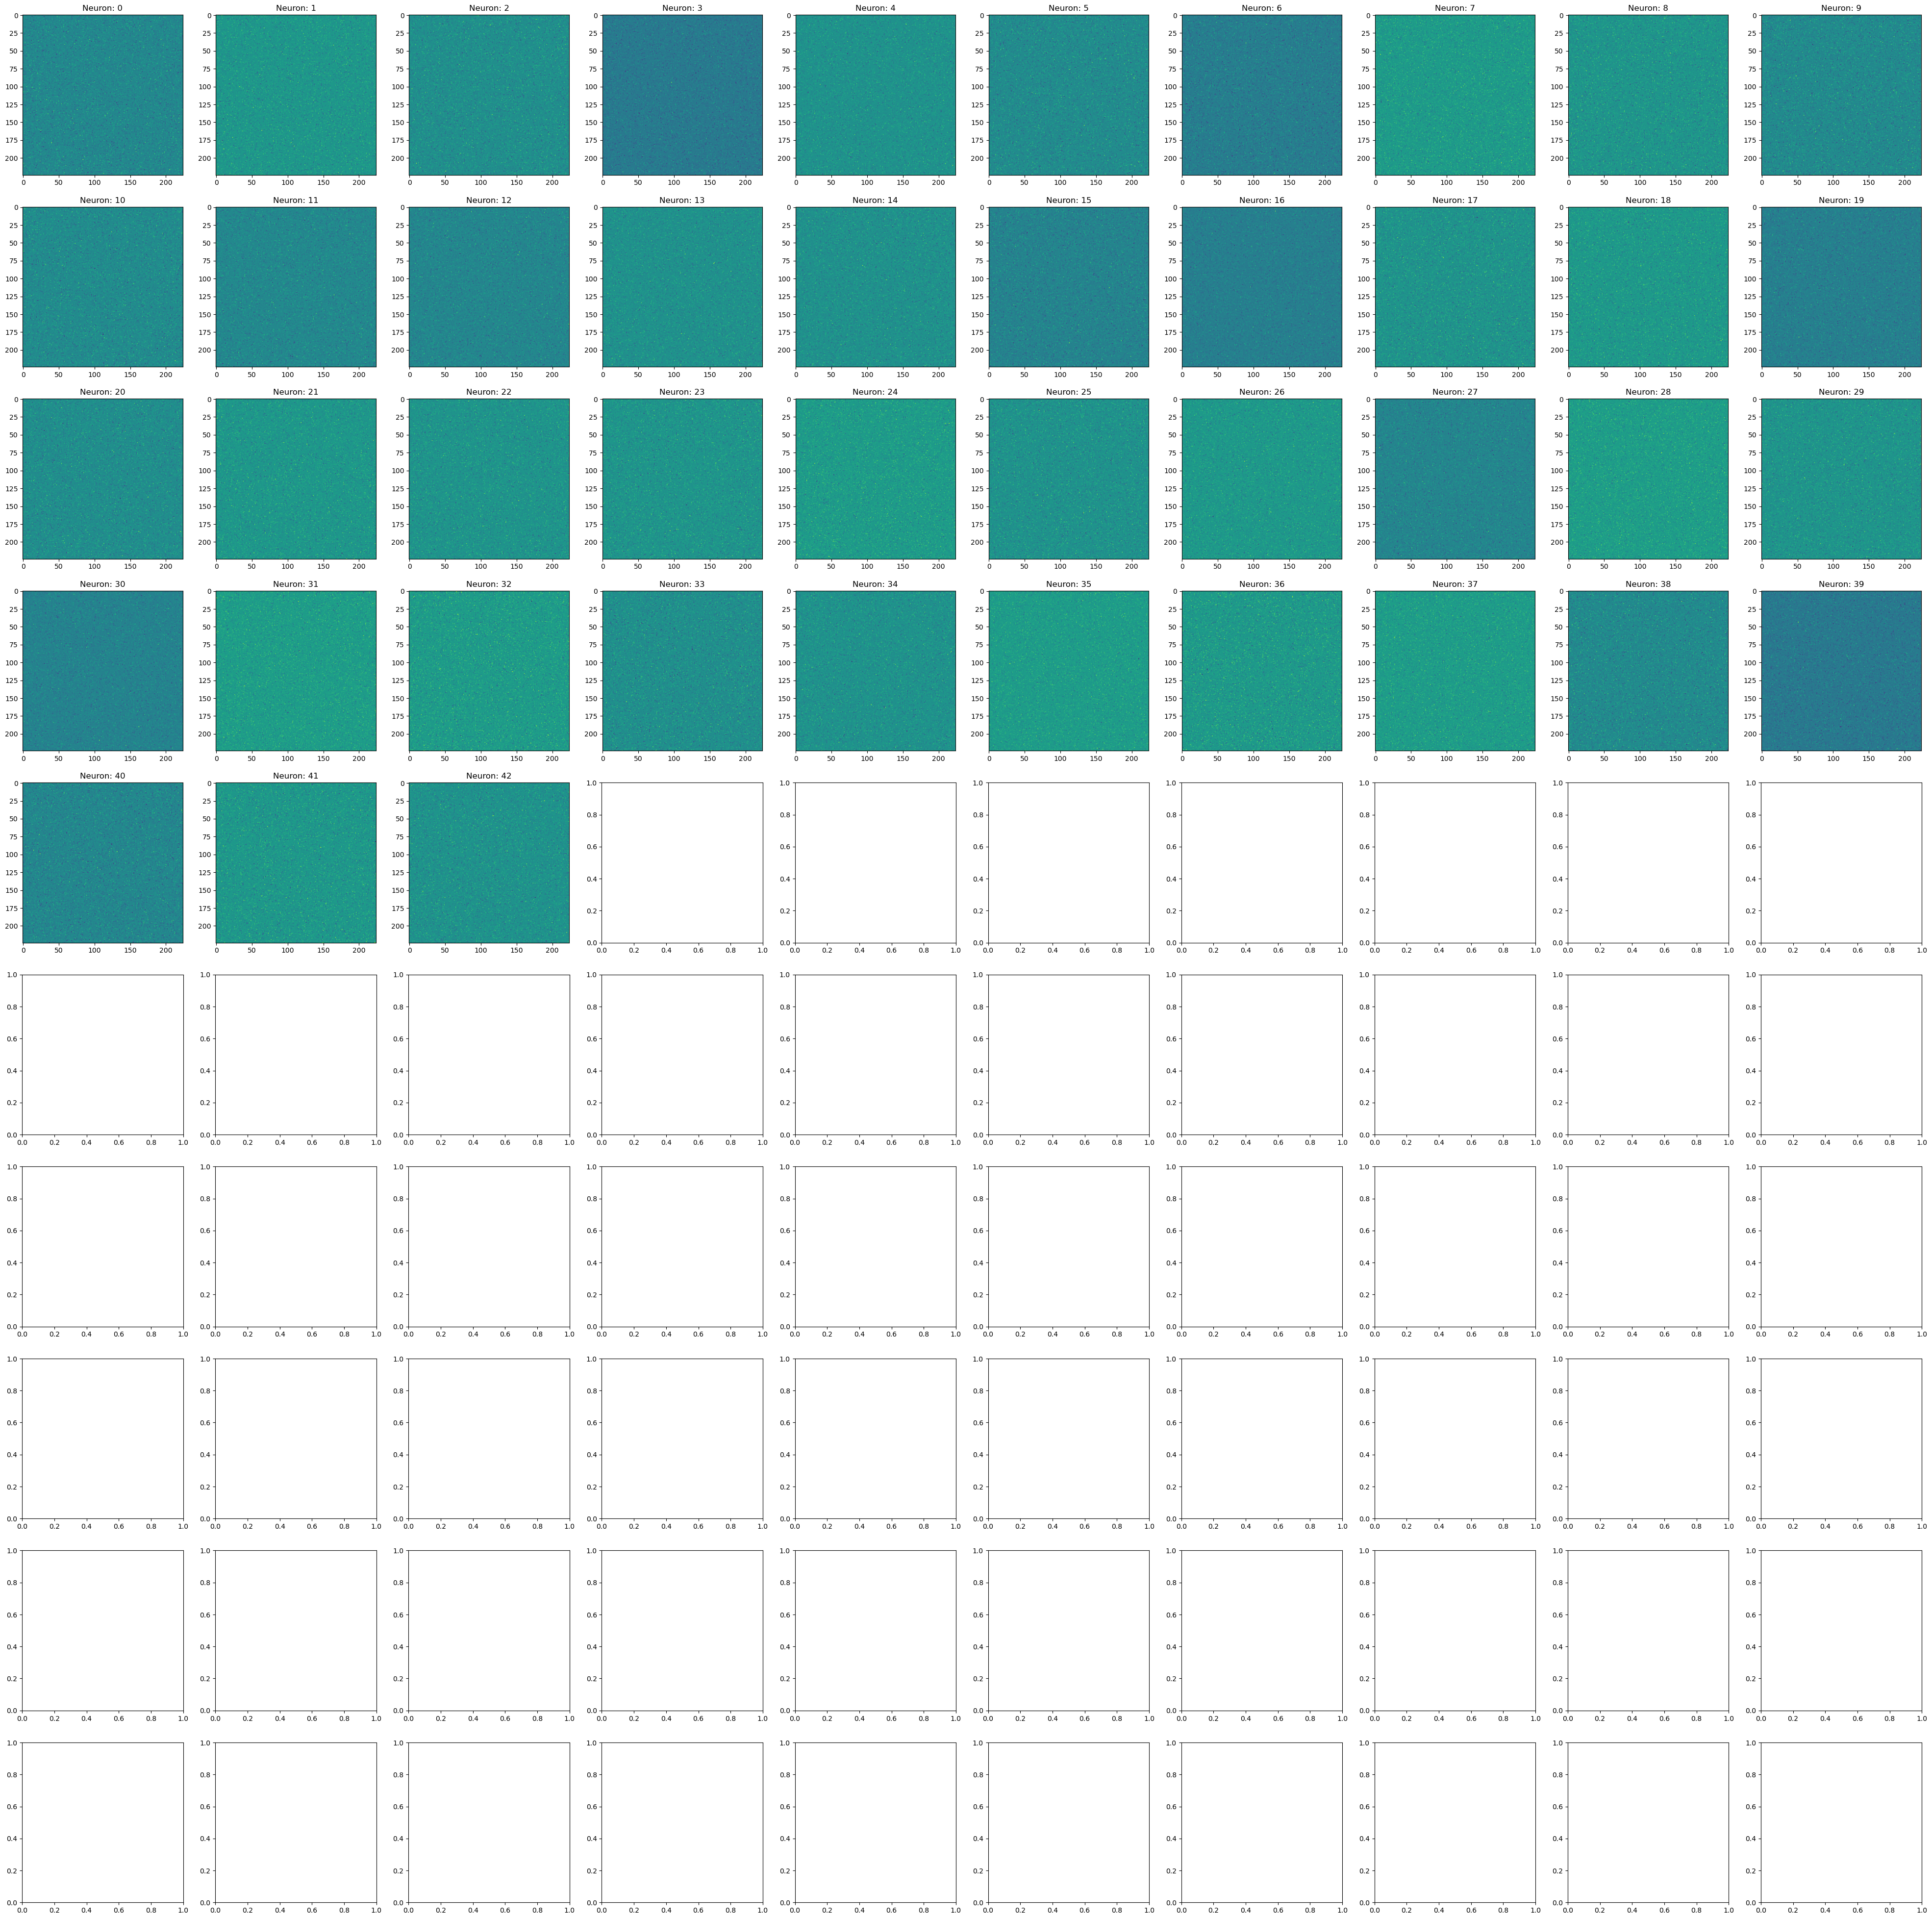

In [13]:
f, ax = plt.subplots(10,10, figsize = (50,50))
for i in range(n_neurons):
    ax[i//10, i%10].imshow(np.mean(w[:,:,:,i], 0))
    ax[i//10, i%10].set_title('Neuron: '+str(i))